In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam.csv',encoding='"ISO-8859-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['v1'].value_counts()
df['labels'] = df['v1'].map({'ham':0,'spam':1})

In [4]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<AxesSubplot:xlabel='v1', ylabel='count'>

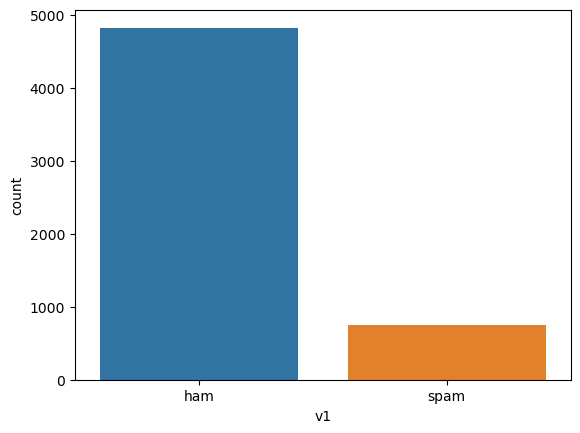

In [5]:
sns.countplot(x='v1', data=df)

In [6]:
X = df['v2']
y = df['labels']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [8]:
featurizer = CountVectorizer()
Xtrain = featurizer.fit_transform(X_train)
Xtest  = featurizer.transform(X_test)

In [9]:
Xtest

<1839x7030 sparse matrix of type '<class 'numpy.int64'>'
	with 22625 stored elements in Compressed Sparse Row format>

In [10]:
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('train acc ', model.score(Xtrain,y_train))
print('tes   acc ', model.score(Xtest,y_test))

train acc  0.9927672113581569
tes   acc  0.9858618814573138


In [11]:
featurizer = TfidfVectorizer()
Xtrain = featurizer.fit_transform(X_train)
Xtest  = featurizer.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('train acc ', model.score(Xtrain,y_train))
print('tes   acc ', model.score(Xtest,y_test))

train acc  0.9697294401285829
tes   acc  0.955410549211528


In [13]:
Ptrain = model.predict(Xtrain)
Ttest  = model.predict(Xtest)
print('F1 Score ' , f1_score(y_train,Ptrain))
print('F1 Score ' , f1_score(y_test,Ttest))

F1 Score  0.869364161849711
F1 Score  0.8110599078341014


In [14]:
prob_train = model.predict_proba(Xtrain)[:,1]
prob_test  = model.predict_proba(Xtest)[:,1]
print('training auc ' , roc_auc_score(y_train,prob_train))
print('tes      auc ' , roc_auc_score(y_test,prob_test))

training auc  0.9937654288300692
tes      auc  0.9810663450176269


In [15]:
cm = confusion_matrix(y_train,Ptrain)
cm

array([[3244,    0],
       [ 113,  376]], dtype=int64)

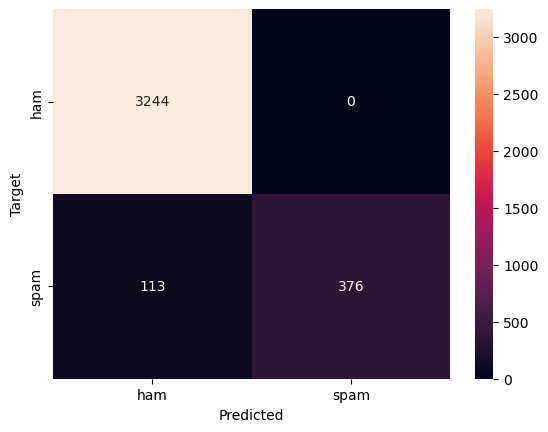

In [16]:
def plot_cm(cm):
    classes = ['ham','spam']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    ax = sns.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

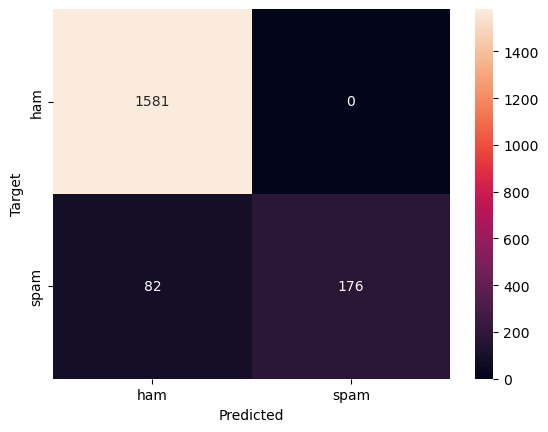

In [17]:
cm_test = confusion_matrix(y_test,Ttest)
plot_cm(cm_test)

In [18]:
def visualize(label):
    words = ''
    for msg in df[df['v1'] == label]['v2']:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

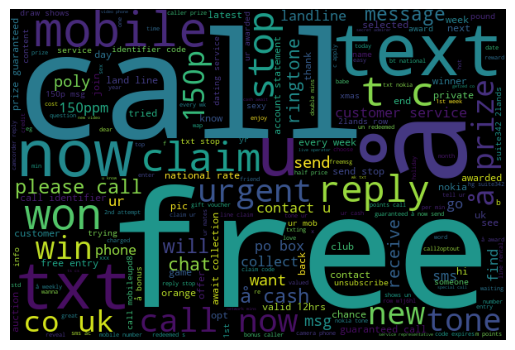

In [19]:
visualize('spam')

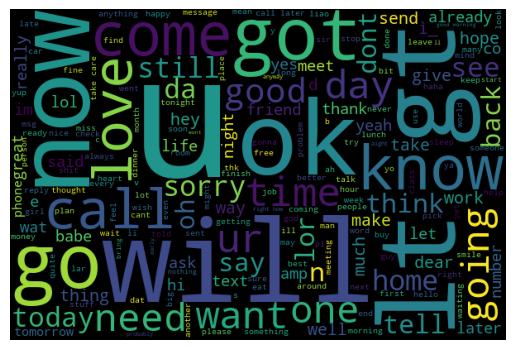

In [20]:
visualize('ham')

In [21]:
X = featurizer.transform(df['v2'])
df['predictions'] = model.predict(X)
df.head()

,v1,v2,labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [22]:
# things that should be spam
sneaky_spam = df[ (df['predictions'] == 0) & (df['labels'] == 1)]['v2']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end
Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery
-PLS STOP bootydelious (32/F) is inviting you to

In [23]:
# things that should be spam
not_spam = df[ (df['predictions'] == 1) & (df['labels'] == 0)]['v2']
for msg in not_spam:
    print(msg)